Snapshot tables for Comp257 Project

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from pandas import ExcelWriter
from pandas import ExcelFile
from matplotlib.pyplot import figure

In [2]:
#Removing warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Data cleaning for State Residence

In [3]:
StateResidence = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 0 )
StateResidence.head()

,Year,State,Population
0,1966,New South Wales,4237900
1,1991,New South Wales,5714974
2,2006,New South Wales,6549174
3,2011,New South Wales,6917656
4,2016,New South Wales,7480228


In [4]:
StateResidence.dtypes

Year           int64
State         object
Population     int64
dtype: object

In [5]:
SR_clean = StateResidence[StateResidence.State != 'Total']

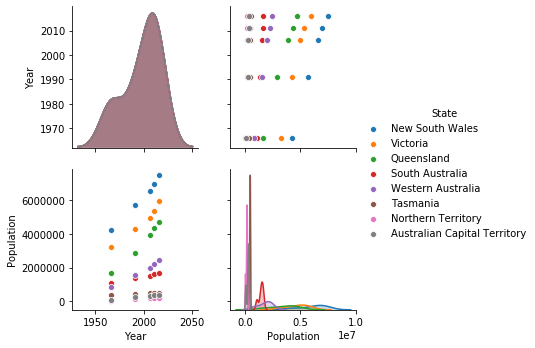

In [6]:
g = sns.pairplot(SR_clean, hue= 'State')

### Data cleaning for Age Sex table

In [7]:
AgeSex = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 2 )
AgeSex.head()

,Year,Gender,Age Group,Number
0,2011,Males,0-4 years,729969
1,2011,Males,5-9 years,694561
2,2011,Males,10-14 years,703308
3,2011,Males,15-19 years,722378
4,2011,Males,20-24 years,741120


In [8]:
AgeSex.columns

Index(['Year', 'Gender', 'Age Group', 'Number'], dtype='object')

In [9]:
AgeSex.rename(columns={'Age Group':'Age_Group'},inplace=True)

In [10]:
AS_clean  = AgeSex[AgeSex.Age_Group != 'Total']
AS_clean.shape


(108, 4)

In [11]:
AS_clean.dtypes

Year          int64
Gender       object
Age_Group    object
Number        int64
dtype: object

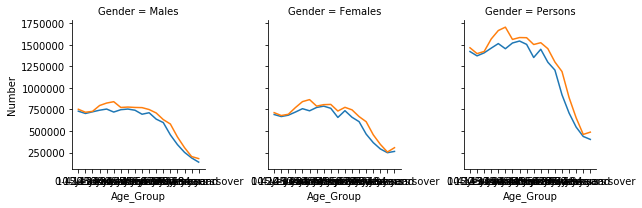

In [12]:
g = sns.FacetGrid(AS_clean,col ='Gender',hue='Year')
g.map(sns.lineplot,'Age_Group','Number')

### Data cleaning for Indigenous Status and State and Territory of Usual residence

In [13]:
IngeniseStat = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 4 )
IngeniseStat.head()

,Age,Year,Aboriginal and Torres Strait Islander people(b),Non-Indigenous people,Indigenous status not stated,Total
0,Median age,2011,21,38,36,37
1,0-4 years,2011,67416,1282736,70897,1421050
2,5-9 years,2011,64936,1222114,64873,1351921
3,10-14 years,2011,64737,1241796,64529,1371054
4,15-19 years,2011,59200,1282020,64577,1405798


In [14]:
IngeniseStat.rename(columns={'Aboriginal and Torres Strait Islander people(b)':'Indigenous'},inplace=True)

In [15]:
IngeniseStat.rename(columns={'Non-Indigenous people':'Non-Indigenous'},inplace=True)

In [16]:
IngeniseStat.rename(columns={'Indigenous status not stated':'Not_Stated'},inplace=True)

In [17]:
IS_clean = IngeniseStat[IngeniseStat.Age !='Median age']

In [18]:
IS_clean.head(10)

,Age,Year,Indigenous,Non-Indigenous,Not_Stated,Total
1,0-4 years,2011,67416,1282736,70897,1421050
2,5-9 years,2011,64936,1222114,64873,1351921
3,10-14 years,2011,64737,1241796,64529,1371054
4,15-19 years,2011,59200,1282020,64577,1405798
5,20-24 years,2011,46454,1333621,80599,1460674
6,25-29 years,2011,38803,1387923,86513,1513236
7,30-34 years,2011,33003,1345765,75012,1453775
8,35-39 years,2011,34074,1414171,71895,1520138
9,40-44 years,2011,33605,1438347,70928,1542879
10,45-49 years,2011,28820,1407494,67831,1504143


graphs needed

### Data cleaning for Country

In [19]:
country = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 6 )
country.head()

,Area,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory
0,Adelie Land (France),0,0,0,0,0,0,0,0
1,Argentinian Antarctic Territory,0,0,0,0,0,0,0,0
2,"Australia (includes External Territories), nfd",0,0,0,0,0,0,0,0
3,Australian Antarctic Territory,0,4,4,0,0,0,0,0
4,"Australian External Territories, nec",0,0,0,0,0,0,0,0


In [20]:
country.columns

Index(['Area', 'New South Wales', 'Victoria', 'Queensland', 'South Australia',
       'Western Australia', 'Tasmania', 'Northern Territory',
       'Australian Capital Territory'],
      dtype='object')

In [46]:
country.shape

(292, 9)

In [21]:
country.rename(columns={'New South Wales':'NSW',
                        'Victoria':'VIC',
                        'Queensland':'QLD',
                        'South Australia':'SA',
                        'Western Australia':'WA',
                        'Tasmania':'TAS',
                        'Northern Territory':'NT',
                        'Australian Capital Territory':'ACT'},
              inplace=True)

In [22]:
country.columns

Index(['Area', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'], dtype='object')

In [23]:
country_clean = country[country.Area != 'Australia']
country_clean = country_clean[country_clean.Area != 'Not stated']

In [30]:
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1440x1280 with 0 Axes>

<Figure size 1440x1280 with 0 Axes>

In [52]:
NSW_CC = country_clean
NSW_CC = NSW_CC.drop(['VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'],axis = 1)
NSW_CC = NSW_CC[NSW_CC.NSW !=0]
NSW_CC.describe()

,NSW
count,261.000000
mean,7940.839080
std,25460.656098
min,3.000000
25%,38.000000
50%,327.000000
75%,5093.000000
max,234508.000000


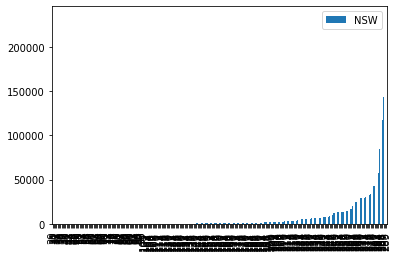

In [50]:
NSW_CC.plot.bar()

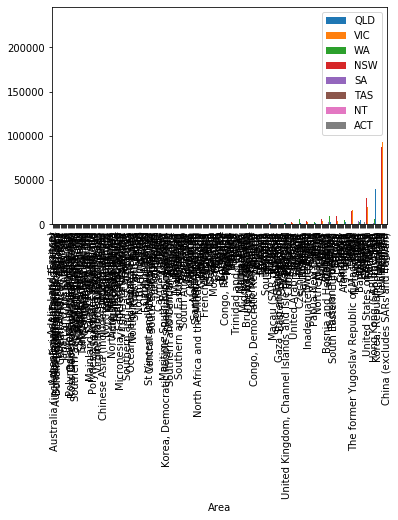

In [53]:
country_clean.plot.bar('Area',{'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'})

In [54]:
country.describe()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
count,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,292.000000,292.000000,292.000000
mean,2.561719e+04,2.029664e+04,1.610693e+04,5.742110e+03,8.474007e+03,1746.280822,783.619863,1360.842466
std,2.886936e+05,2.266803e+05,1.971260e+05,7.022368e+04,8.881068e+04,24187.295488,9347.358154,15880.928684
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.725000e+01,1.175000e+01,1.100000e+01,0.000000e+00,6.000000e+00,0.000000,0.000000,0.000000
50%,2.265000e+02,1.700000e+02,1.495000e+02,4.700000e+01,9.400000e+01,6.000000,5.500000,12.000000
75%,3.573000e+03,2.738750e+03,1.351250e+03,5.440000e+02,1.104000e+03,80.250000,49.250000,204.500000
max,4.899090e+06,3.845493e+06,3.343657e+06,1.192546e+06,1.492842e+06,411490.000000,157531.000000,270033.000000


### Data cleaning for House Composition

In [55]:
HouseCompos = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 10 )
HouseCompos.head(10)

,State,One family households,Multiple family households,Total family households,Group households,Lone person households,Total households,Year
0,New South Wales,1426810,16745,1443555,88566,386439,1918560,1991
1,Victoria,1072422,10423,1082845,62427,290091,1435363,1991
2,Queensland,728631,6405,735036,47018,182389,964443,1991
3,South Australia,370091,2284,372375,19093,110432,501900,1991
4,Western Australia,396766,2979,399745,25134,103484,528363,1991
5,Tasmania,118725,750,119475,5192,34150,158817,1991
6,Northern Territory,32130,1529,33659,3279,7678,44616,1991
7,Australian Capital Territory,68686,510,69196,5352,15710,90258,1991
8,New South Wales,1811533,62994,1874524,109004,620778,2604314,2016
9,Victoria,1459760,35531,1495290,95588,521828,2112706,2016


In [56]:
HouseCompos.columns

Index(['State', 'One family households', 'Multiple family households',
       'Total family households', 'Group households', 'Lone person households',
       'Total households', 'Year'],
      dtype='object')

In [57]:
HouseCompos.rename(columns={'One family households':'Single_family',
                            'Multiple family households':'Multiple_family',
                            'Total family households':'Total_family_households',
                            'Group households':'Group_households',
                            'Lone person households':'Lone_person_households',
                            'Total households':'Total_households'},
                  inplace=True)

In [58]:
HouseCompos.columns

Index(['State', 'Single_family', 'Multiple_family', 'Total_family_households',
       'Group_households', 'Lone_person_households', 'Total_households',
       'Year'],
      dtype='object')

In [59]:
HouseCompos.dtypes

State                      object
Single_family               int64
Multiple_family             int64
Total_family_households     int64
Group_households            int64
Lone_person_households      int64
Total_households            int64
Year                        int64
dtype: object

In [60]:
df = HouseCompos[HouseCompos.Year == 1991]
df.plot.bar(x='State',y={'Single_famiy','Multiple_family','Group_households', 'Lone_person_households'})

KeyError: "['Single_famiy'] not in index"

In [62]:
df = HouseCompos[HouseCompos.Year == 2016]
df.plot.bar(x='State',y={'Single_famiy','Multiple_family','Group_households', 'Lone_person_households'})

KeyError: "['Single_famiy'] not in index"

In [63]:
HouseCompos.plot(x='Year',y={'Single_famiy', 'Multiple_family','Group_households', 'Lone_person_households'})

KeyError: "['Single_famiy'] not in index"

### Data cleaning for State and Territory of Enumeration

In [64]:
PreHouse = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 12 )
PreHouse.head()

,State,Average no. of people per household,Year
0,New South Wales,2.8,1991
1,New South Wales,2.6,2016
2,Victoria,2.8,1991
3,Victoria,2.6,2016
4,Queensland,2.8,1991


In [65]:
PreHouse.columns

Index(['State', 'Average no. of people per household', 'Year'], dtype='object')

In [66]:
PreHouse.rename(columns={'Average no. of people per household':'Average_Pre_House'}, inplace=True)

In [67]:
PreHouse.dtypes

State                 object
Average_Pre_House    float64
Year                   int64
dtype: object

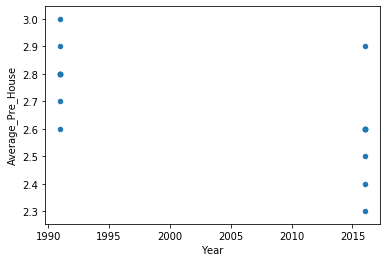

In [68]:
PreHouse.plot.scatter(x = 'Year',y = 'Average_Pre_House')

In [69]:
g= sns.scatterplot(x = 'Year',y = 'Average_Pre_House', hue='State')

ValueError: Could not interpret input 'Year'

In [70]:
FamilyCompos = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 15 )
FamilyCompos.head()

,Unnamed: 0,Year,Couple families with children,Couple families without children,Total
0,Male same-sex couples,2011,502,17081,17583
1,Female same-sex couples,2011,3581,12551,16132
2,Total same-sex couples,2011,4083,29632,33715
3,Opposite-sex couples,2011,2530318,2120670,4650988
4,Male same-sex couples,2016,1067,22676,23741


In [71]:
DewlingStruct = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 17 )
DewlingStruct.head()

,State,Separate house,"Semi-detached, row or terrace house, townhouse etc.",Flat or apartment,Total households,Year
0,Australian Capital Territory,94266,18810,16071,129425,2011
1,Australian Capital Territory,95520,25278,21404,142664,2016
2,New South Wales,1717699,263926,465189,2471299,2011
3,New South Wales,1729820,317447,519380,2604314,2016
4,Northern Territory,41188,6880,10084,60891,2011


### Tenure

In [72]:
Tenure = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 18 )
Tenure.head()

,State,Owned outright,Owned with a mortgage,Rented,Total Dwellings,year
0,Australian Capital Territory,22770,35190,29771,90258,1991
1,Australian Capital Territory,38555,54832,45346,142664,2016
2,New South Wales,818215,487459,525542,1918560,1991
3,New South Wales,839665,840004,826922,2604314,2016
4,Northern Territory,5867,10788,23682,44616,1991


In [75]:
Tenure.columns

Index(['State', 'Owned outright', 'Owned with a mortgage', 'Rented',
       'Total Dwellings', 'year'],
      dtype='object')

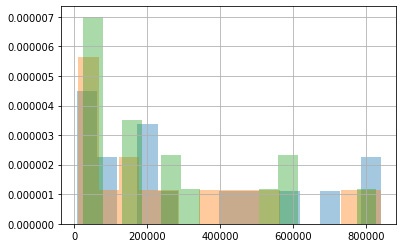

In [101]:
Tenure1 = Tenure[Tenure.year != '1991']
TOO1 = Tenure1['Owned outright']
TOM1 = Tenure1['Owned with a mortgage']
TRE1 = Tenure1['Rented']
TOO1.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)
TOM1.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)
TRE1.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)



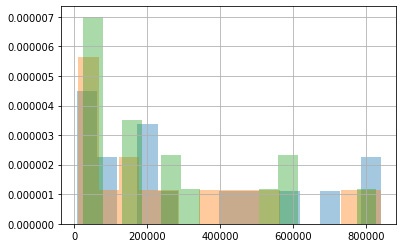

In [102]:
Tenure2 = Tenure[Tenure.year != '2016']
TOO2 = Tenure2['Owned outright']
TOM2 = Tenure2['Owned with a mortgage']
TRE2 = Tenure2['Rented']
TOO2.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)
TOM2.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)
TRE2.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)



Sales Table for Project Comp257

In [486]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
import warnings
from sklearn import linear_model

In [490]:
LGA = pd.read_excel('data/Sales-Tables-clean-Mar-Quarter-2018.xlsx', sheet_name= 1)

In [491]:
postcode = pd.read_excel('data/Sales-Tables-clean-Mar-Quarter-2018.xlsx', sheet_name=2)

### LGAs Analysis ###

In [492]:
LGA.shape

(2747, 14)

In [493]:
postcode.shape

(1332, 11)

In [494]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [495]:
LGA.replace(to_replace="s",value=30,inplace=True)
LGA.replace(to_replace='-',value=10,inplace=True)

In [496]:
LGA.head(10)

,GMR (Greater Metropolitan Region),Greater Sydney,Rings,Local Government Areas (LGAs),DwellingType,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,Total,Total,Total,Total,Total,455,635,870,764,19558,-0.0231,-0.0508,-0.2309,-0.3087
1,Total,Total,Total,Total,Non Strata,440,630,895,779,13598,-0.0308,-0.0526,-0.2330,-0.2873
2,Total,Total,Total,Total,Strata,485,640,830,730,5960,-0.0303,-0.0448,-0.2262,-0.3530
3,Total,Total,Total,Albury,Total,240,320,415,340,198,0.0492,0.0492,-0.2414,-0.2747
4,Total,Total,Total,Albury,Non Strata,260,352,438,370,162,-0.0154,0.0430,-0.2430,-0.2249
5,Total,Total,Total,Albury,Strata,156,212,240,205,36,0.0012,-0.0128,-0.2340,-0.4375
6,Total,Total,Total,Armidale Regional,Total,265,350,459,355,87,0.0072,0.0145,-0.3256,-0.3308
7,Total,Total,Total,Armidale Regional,Non Strata,266,360,461,362,80,0.0141,0.0286,-0.3103,-0.3333
8,Total,Total,Total,Armidale Regional,Strata,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
9,Total,Total,Total,Ballina,Total,500,577,730,635,116,-0.0580,-0.0738,-0.3626,-0.3895


In [497]:
LGA.dtypes

GMR (Greater Metropolitan Region)      object
Greater Sydney                         object
Rings                                  object
Local Government Areas (LGAs)          object
DwellingType                           object
First Quartile Sales Price\n$'000s      int64
Median Sales Price\n$'000s              int64
Third Quartile Sales Price\n'000s       int64
Mean Sales Price\n$'000s                int64
Sales\nNo.                              int64
Qtly change in Median                 float64
Annual change in Median               float64
Qtly change in Count                  float64
Annual change in Count                float64
dtype: object

In [498]:
LGA.columns

Index(['GMR (Greater Metropolitan Region)', 'Greater Sydney', 'Rings',
       'Local Government Areas (LGAs)', 'DwellingType',
       'First Quartile Sales Price\n$'000s', 'Median Sales Price\n$'000s',
       'Third Quartile Sales Price\n'000s', 'Mean Sales Price\n$'000s',
       'Sales\nNo.', 'Qtly change in Median', 'Annual change in Median',
       'Qtly change in Count', 'Annual change in Count'],
      dtype='object')

We have just checked the column titles for the LGA dataframe and now we are changing the name of the columns so it is easier in our analysis process

In [499]:
LGA.rename(columns={'GMR (Greater Metropolitan Region)':'GMR',
                    'Greater Sydney':'Greater_Sydney',
                    'Local Government Areas (LGAs)':'LGA',
                    'DwellingType':'Dwelling_Types',
                    'Sales No.':'Sales_No',
                    'Qtly change in Median':'Qtly_change_median',
                    'Annual change in Median':'Annual_change_median',
                    'Qtly change in Count':'Qtly_change_Count',
                    'Annual change in Count':'Annual_change_Count'},
           inplace=True)

In [500]:
LGA.head(10)

,GMR,Greater_Sydney,Rings,LGA,Dwelling_Types,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly_change_median,Annual_change_median,Qtly_change_Count,Annual_change_Count
0,Total,Total,Total,Total,Total,455,635,870,764,19558,-0.0231,-0.0508,-0.2309,-0.3087
1,Total,Total,Total,Total,Non Strata,440,630,895,779,13598,-0.0308,-0.0526,-0.2330,-0.2873
2,Total,Total,Total,Total,Strata,485,640,830,730,5960,-0.0303,-0.0448,-0.2262,-0.3530
3,Total,Total,Total,Albury,Total,240,320,415,340,198,0.0492,0.0492,-0.2414,-0.2747
4,Total,Total,Total,Albury,Non Strata,260,352,438,370,162,-0.0154,0.0430,-0.2430,-0.2249
5,Total,Total,Total,Albury,Strata,156,212,240,205,36,0.0012,-0.0128,-0.2340,-0.4375
6,Total,Total,Total,Armidale Regional,Total,265,350,459,355,87,0.0072,0.0145,-0.3256,-0.3308
7,Total,Total,Total,Armidale Regional,Non Strata,266,360,461,362,80,0.0141,0.0286,-0.3103,-0.3333
8,Total,Total,Total,Armidale Regional,Strata,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
9,Total,Total,Total,Ballina,Total,500,577,730,635,116,-0.0580,-0.0738,-0.3626,-0.3895


In [501]:
LGA_clean =  LGA[LGA.Dwelling_Types != 'Total']

In [502]:
LGA_clean.shape

(1698, 14)

In [503]:
LGA_clean = LGA_clean[LGA_clean.LGA != 'Total']

In [504]:
LGA_clean.shape

(1632, 14)

In [505]:
LGA_clean.head(5)

,GMR,Greater_Sydney,Rings,LGA,Dwelling_Types,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly_change_median,Annual_change_median,Qtly_change_Count,Annual_change_Count
4,Total,Total,Total,Albury,Non Strata,260,352,438,370,162,-0.0154,0.0430,-0.2430,-0.2249
5,Total,Total,Total,Albury,Strata,156,212,240,205,36,0.0012,-0.0128,-0.2340,-0.4375
7,Total,Total,Total,Armidale Regional,Non Strata,266,360,461,362,80,0.0141,0.0286,-0.3103,-0.3333
8,Total,Total,Total,Armidale Regional,Strata,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
10,Total,Total,Total,Ballina,Non Strata,553,640,773,698,71,-0.0394,-0.1172,-0.4083,-0.4132


In [506]:
LGA_clean.describe()

,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly_change_median,Annual_change_median,Qtly_change_Count,Annual_change_Count
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000
mean,453.950980,554.181373,694.014706,593.955882,98.916667,1.646874,1.634178,1.470395,1.424354
std,458.474283,582.538323,778.024018,641.941310,116.697654,3.737760,3.743886,3.819444,3.838966
min,10.000000,10.000000,10.000000,10.000000,10.000000,-0.382400,-0.333300,-0.688900,-0.646300
25%,183.000000,246.750000,311.500000,257.750000,30.000000,-0.052125,-0.100200,-0.323950,-0.365900
50%,345.000000,405.500000,492.500000,427.500000,52.500000,-0.013500,-0.016700,-0.216100,-0.265700
75%,591.250000,675.750000,807.000000,708.250000,136.250000,0.075350,0.092075,-0.065850,-0.089725
max,2869.000000,3960.000000,5913.000000,4434.000000,845.000000,10.000000,10.000000,10.000000,10.000000


We can see from the result above, Early days of the year people don't have confidence to splash into realestate possibly because they want to observe trend in the market but as time goes by buyer will have more confidence in the market they acquire with higher price. Minimum Sales No. possibly in more expensive areas whereas the Max Sales Price is observed and Maximum Sales No. is possibly observed in areas where it is more affordable for everyone. We can also observe, people are recently loosing confidence in low price areas whereas higher confidence in terns of price is observed, in terms of count though the result is quite opposite.

In [507]:
LGA_clean.columns

Index(['GMR', 'Greater_Sydney', 'Rings', 'LGA', 'Dwelling_Types',
       'First Quartile Sales Price\n$'000s', 'Median Sales Price\n$'000s',
       'Third Quartile Sales Price\n'000s', 'Mean Sales Price\n$'000s',
       'Sales\nNo.', 'Qtly_change_median', 'Annual_change_median',
       'Qtly_change_Count', 'Annual_change_Count'],
      dtype='object')

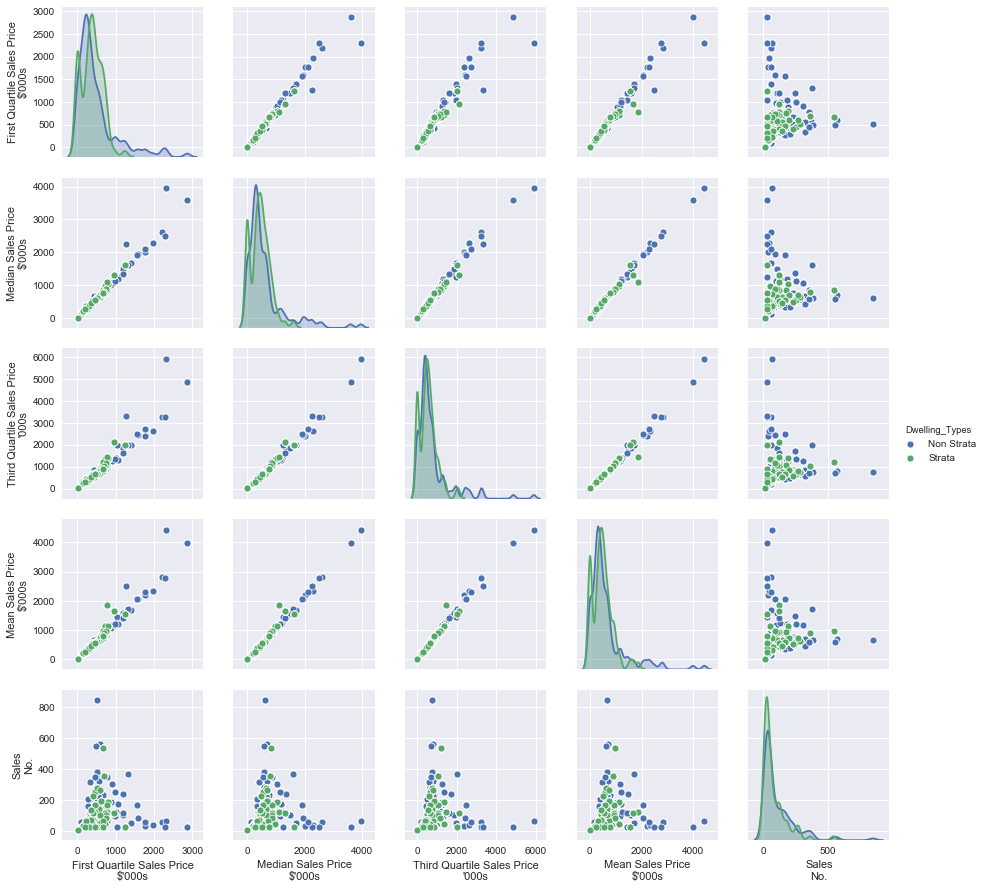

In [508]:
graph_dwell = sns.pairplot(LGA_clean,vars=['First Quartile Sales Price\n$\'000s',
       'Median Sales Price\n$\'000s',
       'Third Quartile Sales Price\n\'000s','Mean Sales Price\n$\'000s',
       'Sales\nNo.'],hue='Dwelling_Types')

In [509]:
##Blue non-strata, green strata##

From the above graph we can see overall, Sales No for both Strata and Non-strata property, as price whether it is First Quartile or Third Quartile, as Sale Price goes up, Sales No. starts declining. In Third Quartile, because of buyer's confidence we can quite a few Non-strata property being sold for voer 4 millions and lots of strata property in range of 2 millions which is not the case in First Quarter. Other than Sales No. for both types of properties, the relation between them looks positive since when one variable is increasing other also being positively affected, and usually the non-strata is outnumbering strata property in each relationship.

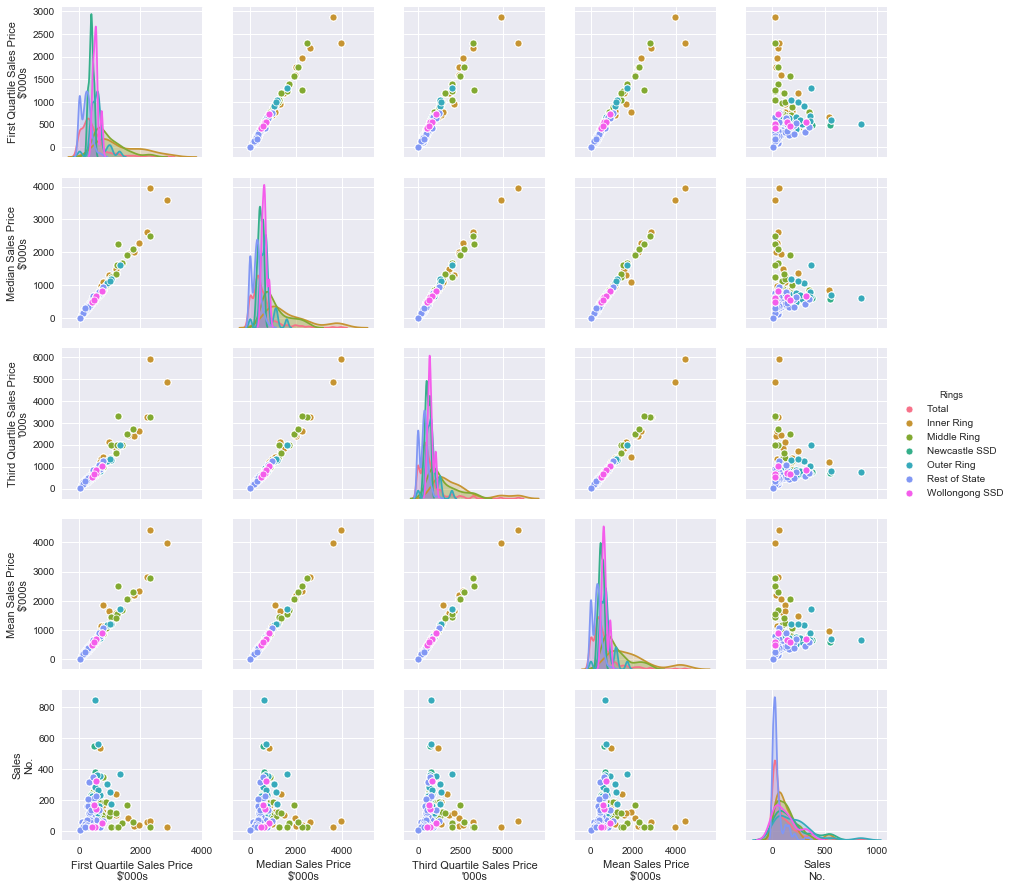

In [510]:
graph_ring = sns.pairplot(LGA_clean,vars=['First Quartile Sales Price\n$\'000s',
       'Median Sales Price\n$\'000s',
       'Third Quartile Sales Price\n\'000s','Mean Sales Price\n$\'000s',
       'Sales\nNo.'],hue='Rings')

From the graph above, we can see the most expensive house are in the inner ring whereas Rest of State and Woolongong SSD and Newcastle SSD are not as expensive as Inner Ring. We can also observe that houses in Inner Ring are almost impossible to be buy under the price of 2millions. On the other hand, we can see since the price is low, Sales No. is comparatively higher in those areas. This can be easily interpreted as people due to rising real estate price in inner sydney area, people are moving outside CBD where the price is under their budget. Rest of other variable are positively correlated to each other, and one distinct feature we can observe is the cluster between rest of the Rings but Inner Ring is looks quite far from rest to show the price difference to other areas. This make us think that why complain about House price hiking, just move to country then again, jobs, education and facility come into play for making these choices.

In [511]:
reg = linear_model.LinearRegression()
X = LGA[['First Quartile Sales Price\n$\'000s']]
y = LGA['Median Sales Price\n$\'000s']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [1.26921869] + -8.121844856971393


May be we instead of replacing "-" and "s" with NaN we should give the value of 10 or 30 as described.

### Postcode Analysis###

In [526]:
postcode.head(10)

,Postcode,Dwelling_Types,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,2000,Total,848,1160,1643,1348,103,-0.0169,-0.1375,-0.1043,-0.1488
1,2000,Non Strata,-,-,-,-,-,-,-,-,-
2,2000,Strata,845,1135,1600,1322,101,-0.034,-0.092,-0.0734,-0.1062
3,2007,Total,280,641,650,517,s,-0.0642,-0.1097,-0.1333,-0.3158
4,2007,Strata,280,641,650,517,s,-0.0642,-0.1097,-0.1333,-0.3158
5,2008,Total,620,859,1200,869,s,-0.0012,0.0412,-0.5714,-0.4615
6,2008,Non Strata,-,-,-,-,-,-,-,-,-
7,2008,Strata,610,670,1075,837,s,-0.1677,-0.1213,-0.587,-0.4412
8,2009,Total,950,1300,2300,1651,s,0.3065,0.1586,-0.5641,-0.5405
9,2009,Non Strata,-,-,-,-,-,-,-,-,-


In [527]:
postcode.shape

(1332, 11)

In [537]:
postcode.replace(to_replace="s",value=30,inplace=True)
postcode.replace(to_replace='-',value=10,inplace=True)

In [538]:
postcode.dtypes

Postcode                                int64
Dwelling_Types                         object
First Quartile Sales Price\n$'000s      int64
Median Sales Price\n$'000s              int64
Third Quartile Sales Price\n'000s       int64
Mean Sales Price\n$'000s                int64
Sales\nNo.                              int64
Qtly change in Median                 float64
Annual change in Median               float64
Qtly change in Count                  float64
Annual change in Count                float64
dtype: object

In [539]:
postcode.rename(columns={'Dwelling Type':'Dwelling_Types'}, inplace=True)

In [540]:
postcode_clean =  postcode[postcode.Dwelling_Types != 'Total']

In [541]:
postcode_clean.shape

(813, 11)

In [542]:
postcode_clean.head(5)

,Postcode,Dwelling_Types,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
1,2000,Non Strata,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
2,2000,Strata,845,1135,1600,1322,101,-0.0340,-0.0920,-0.0734,-0.1062
4,2007,Strata,280,641,650,517,30,-0.0642,-0.1097,-0.1333,-0.3158
6,2008,Non Strata,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
7,2008,Strata,610,670,1075,837,30,-0.1677,-0.1213,-0.5870,-0.4412


In [543]:
postcode_clean.head(10)

,Postcode,Dwelling_Types,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
1,2000,Non Strata,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
2,2000,Strata,845,1135,1600,1322,101,-0.0340,-0.0920,-0.0734,-0.1062
4,2007,Strata,280,641,650,517,30,-0.0642,-0.1097,-0.1333,-0.3158
6,2008,Non Strata,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
7,2008,Strata,610,670,1075,837,30,-0.1677,-0.1213,-0.5870,-0.4412
9,2009,Non Strata,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
10,2009,Strata,913,1325,2413,1690,30,0.3317,0.1809,-0.5897,-0.5676
12,2010,Non Strata,1270,1428,1794,1528,30,-0.2003,-0.3202,-0.4359,-0.1852
13,2010,Strata,660,761,930,814,53,-0.1683,-0.2630,-0.5310,-0.5047
15,2011,Strata,540,863,1290,1046,73,-0.1477,-0.0858,-0.3707,-0.3482


In [544]:
postcode_clean.describe()

,Postcode,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,812.000000,813.000000,812.000000
mean,2357.340713,417.594096,487.824108,601.744157,525.325953,28.996310,4.072207,4.050806,3.986565,3.944851
std,259.725700,494.180782,582.919037,801.710306,653.445292,24.398503,4.928628,4.951790,5.004384,5.042201
min,2000.000000,10.000000,10.000000,10.000000,10.000000,10.000000,-0.417000,-0.477700,-0.702100,-0.750000
25%,2136.000000,10.000000,10.000000,10.000000,10.000000,10.000000,-0.037900,-0.094150,-0.247300,-0.313325
50%,2299.000000,341.000000,397.000000,478.000000,421.000000,30.000000,0.076900,0.044450,0.057100,-0.008950
75%,2549.000000,650.000000,743.000000,850.000000,767.000000,30.000000,10.000000,10.000000,10.000000,10.000000
max,3691.000000,5000.000000,5700.000000,8050.000000,6568.000000,198.000000,10.000000,10.000000,10.000000,10.000000


From above, we can see minimum First Quartile Sales Price is less than 50 times lesser compared to maximum of over 5 millions. Similar to LGA data, heading past middle of the year, buyer are happy to pay more compared to earlier months which we can see from minimum Sales Price jumping from 91000 to 19400 and maximum Sales Price going over 8million from under 6million from First Quartile Sales to Third Quartile . The minimum Sales No. for the year by the postcode was 30 whereas Maximum was almost 7 times of that. If we look at the change in Count, due to rocketing price in realestate market, people seem to have lost confidence in investing money.

In [545]:
postcode_clean.columns

Index(['Postcode', 'Dwelling_Types', 'First Quartile Sales Price\n$'000s',
       'Median Sales Price\n$'000s', 'Third Quartile Sales Price\n'000s',
       'Mean Sales Price\n$'000s', 'Sales\nNo.', 'Qtly change in Median',
       'Annual change in Median', 'Qtly change in Count',
       'Annual change in Count'],
      dtype='object')

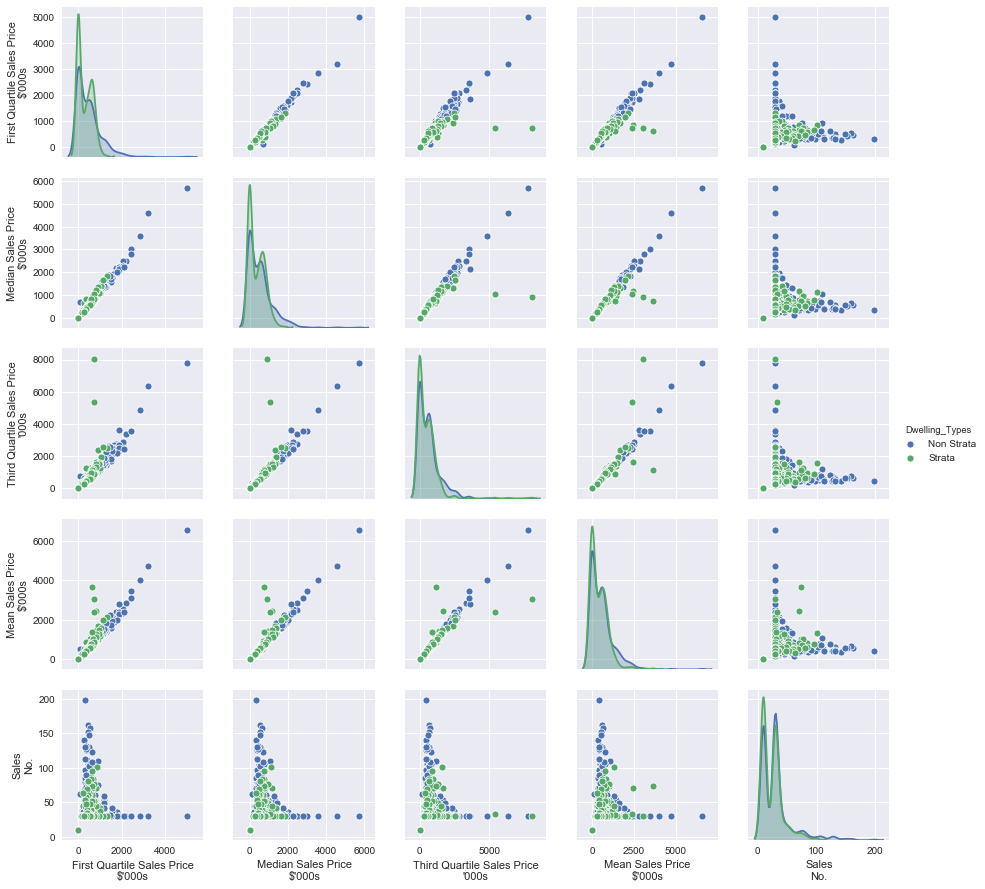

In [546]:
postcode_clean.plot = sns.pairplot(postcode_clean,vars=['First Quartile Sales Price\n$\'000s',
       'Median Sales Price\n$\'000s',
       'Third Quartile Sales Price\n\'000s','Mean Sales Price\n$\'000s',
       'Sales\nNo.'],hue='Dwelling_Types')

From the above plot, we can see generally Sales No, Median and Mean Sales Price, First Quartile Sales Price, Third Quartile Sales Price are comparitively higher for Non-Strata properties. Similar to LGA result, we can see positive linear relation between variables other than Sales No.. For Sales No. though we can see generally having Sales No. high means it is more affordable postcode and less less Sales Price whether it is First Quartile or Third.

In [548]:
reg = linear_model.LinearRegression()
X = postcode[['First Quartile Sales Price\n$\'000s']]
y = postcode['Median Sales Price\n$\'000s']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [1.1982276] + 2.611610365943079


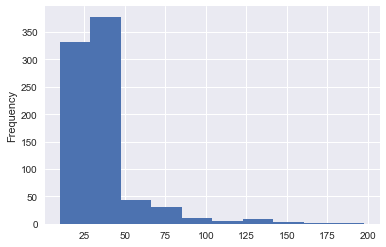

In [549]:
Sales_No= postcode_clean['Sales\nNo.']
Sales_No.plot.hist()

## Rentables for Project Comp257 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
LGA = pd.read_excel('data/Rent-Tables-clean-Jun-Quarter-2019.xlsx', sheet_name= 0)
print("Shape of LGA: ",LGA.shape)

Shape of LGA:  (33067, 15)


In [3]:
LGA.replace(to_replace="-",value=10,inplace=True)
LGA.replace(to_replace="s",value=30,inplace=True)
LGA.head(200)

,GMR (Greater Metropolitan Region),Greater Sydney,Rings,LGA (Local Government Areas),Dwelling Types,Bedroom Numbers,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
0,Total,Total,Total,Total,Total,Total,375,475,600,74871,764400,-0.0104,-0.0104,-0.0778,0.0240
1,Total,Total,Total,Total,Total,Bedsitter,315,390,465,860,8880,-0.0488,0.0000,-0.1739,-0.1088
2,Total,Total,Total,Total,Total,1 Bedroom,340,450,550,12637,105243,-0.0217,-0.0217,-0.1416,0.0235
3,Total,Total,Total,Total,Total,Not Specified,350,440,560,2796,57312,0.0115,-0.0414,-0.0729,-0.2183
4,Total,Total,Total,Total,Total,2 Bedrooms,360,465,610,27859,278716,-0.0510,-0.0312,-0.0779,0.0655
5,Total,Total,Total,Total,Total,3 Bedrooms,380,450,600,20109,214476,-0.0217,0.0000,-0.0504,0.0090
6,Total,Total,Total,Total,Total,4 or more Bedrooms,465,560,710,10610,99773,-0.0175,0.0000,-0.0374,0.0456
7,Total,Total,Total,Total,House,Total,370,460,600,28092,275182,0.0000,0.0222,-0.0381,0.0133
8,Total,Total,Total,Total,House,Bedsitter,373,450,580,99,662,0.0465,0.0000,-0.0388,0.0313
9,Total,Total,Total,Total,House,1 Bedroom,240,310,421,740,5072,-0.0312,0.0000,-0.2077,0.0379


In [4]:
postcode = pd.read_excel('data/Rent-Tables-clean-Jun-Quarter-2019.xlsx', sheet_name=1)


In [5]:
postcode.replace(to_replace="-",value=10,inplace=True)
postcode.replace(to_replace="s",value=30,inplace=True)
print("Shape of postcode: ",postcode.shape)
postcode.head()

Shape of postcode:  (16481, 12)


,Postcode,Dwelling Types,Bedroom Numbers,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
0,1360,Total,Total,10,10,10,10,10,10.0,10.0,10.0,10.0
1,1360,Total,2 Bedrooms,10,10,10,10,10,10.0,10.0,10.0,10.0
2,1360,Flat/Unit,Total,10,10,10,10,10,10.0,10.0,10.0,10.0
3,1360,Flat/Unit,2 Bedrooms,10,10,10,10,10,10.0,10.0,10.0,10.0
4,1790,Total,Total,10,10,10,10,10,10.0,10.0,10.0,10.0


In [6]:
LGA.dtypes

GMR (Greater Metropolitan Region)               object
Greater Sydney                                  object
Rings                                           object
LGA (Local Government Areas)                    object
Dwelling Types                                  object
Bedroom Numbers                                 object
First Quartile Weekly Rent for New Bonds\n$      int64
Median Weekly Rent for New Bonds\n$              int64
Third Quartile Weekly Rent for New Bonds\n$      int64
New Bonds Lodged\nNo.                            int64
Total Bonds Held\nNo.                            int64
Quarterly change in Median Weekly Rent         float64
Annual change in Median Weekly Rent            float64
Quarterly change in New Bonds Lodged           float64
Annual change in New Bonds Lodged              float64
dtype: object

In [7]:
LGA.columns

Index(['GMR (Greater Metropolitan Region)', 'Greater Sydney', 'Rings',
       'LGA (Local Government Areas)', 'Dwelling Types', 'Bedroom Numbers',
       'First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.', 'Quarterly change in Median Weekly Rent',
       'Annual change in Median Weekly Rent',
       'Quarterly change in New Bonds Lodged',
       'Annual change in New Bonds Lodged'],
      dtype='object')

In [8]:
LGA.rename(columns={'GMR (Greater Metropolitan Region)':'GMR',
                    'Greater Sydney':'Greater_Sydney',
                    'LGA (Local Government Areas)':'LGA',
                    'Dwelling Types':'Dwelling_Types',
                    'Bedroom Numbers':'Bedroom_Numbers'},
           inplace=True)

### Renaming Columns and determinig correlation

In [9]:
LGA_clean =  LGA[LGA.Bedroom_Numbers != 'Total']

In [10]:
LGA_clean =  LGA_clean[LGA_clean.Dwelling_Types != 'Total']

In [11]:
LGA_clean = LGA_clean[LGA_clean.LGA != 'Total']

In [12]:
LGA_clean.shape

(20848, 15)

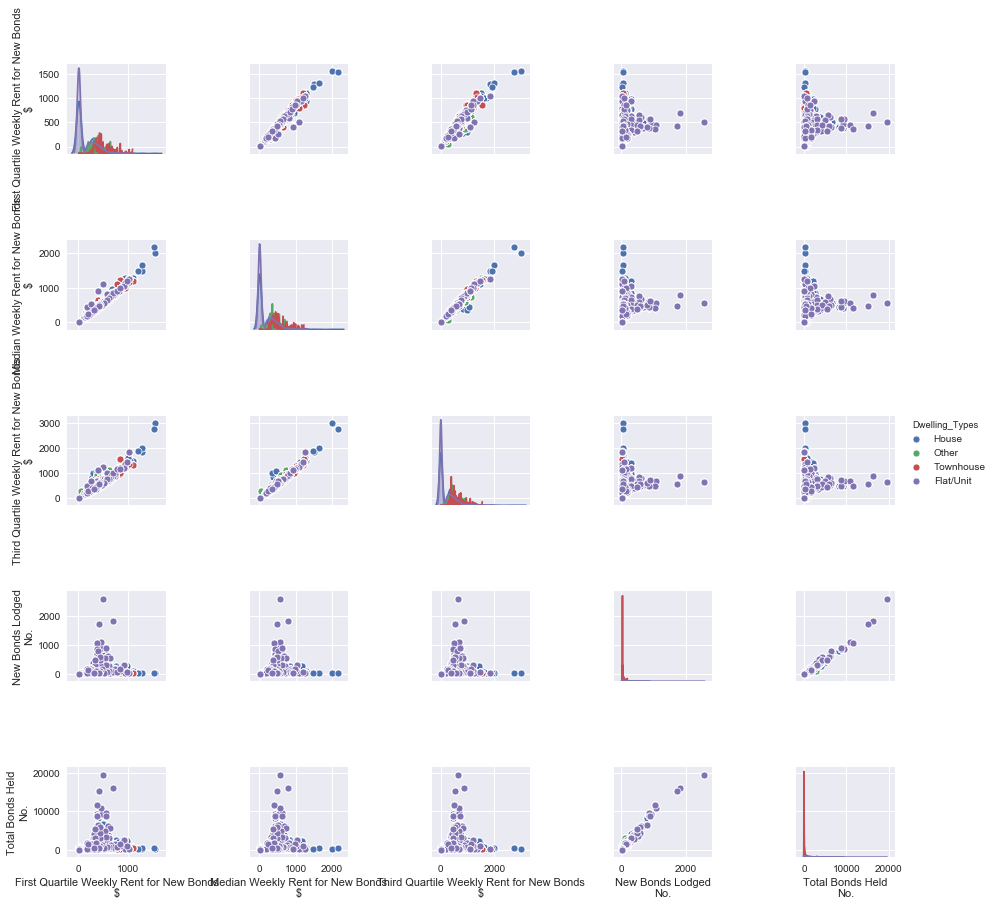

In [13]:
g = sns.pairplot(LGA_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'],hue='Dwelling_Types')

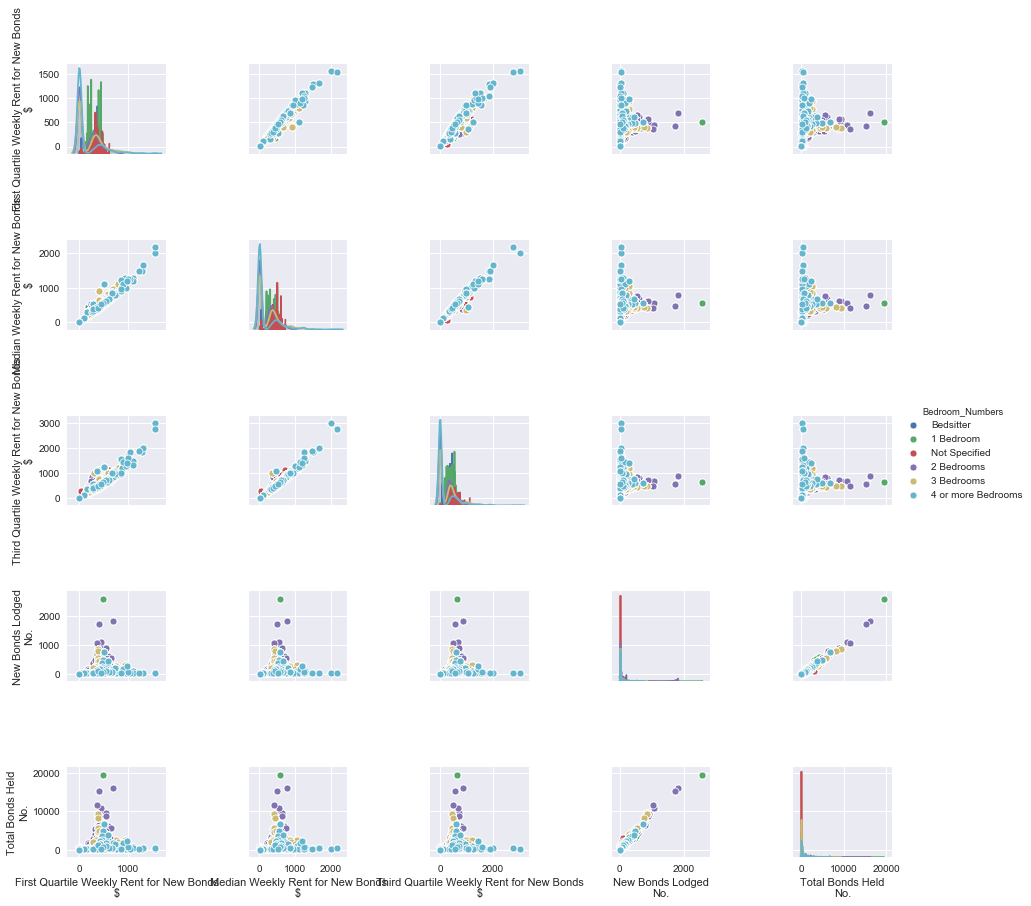

In [14]:
g = sns.pairplot(LGA_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'], hue='Bedroom_Numbers')

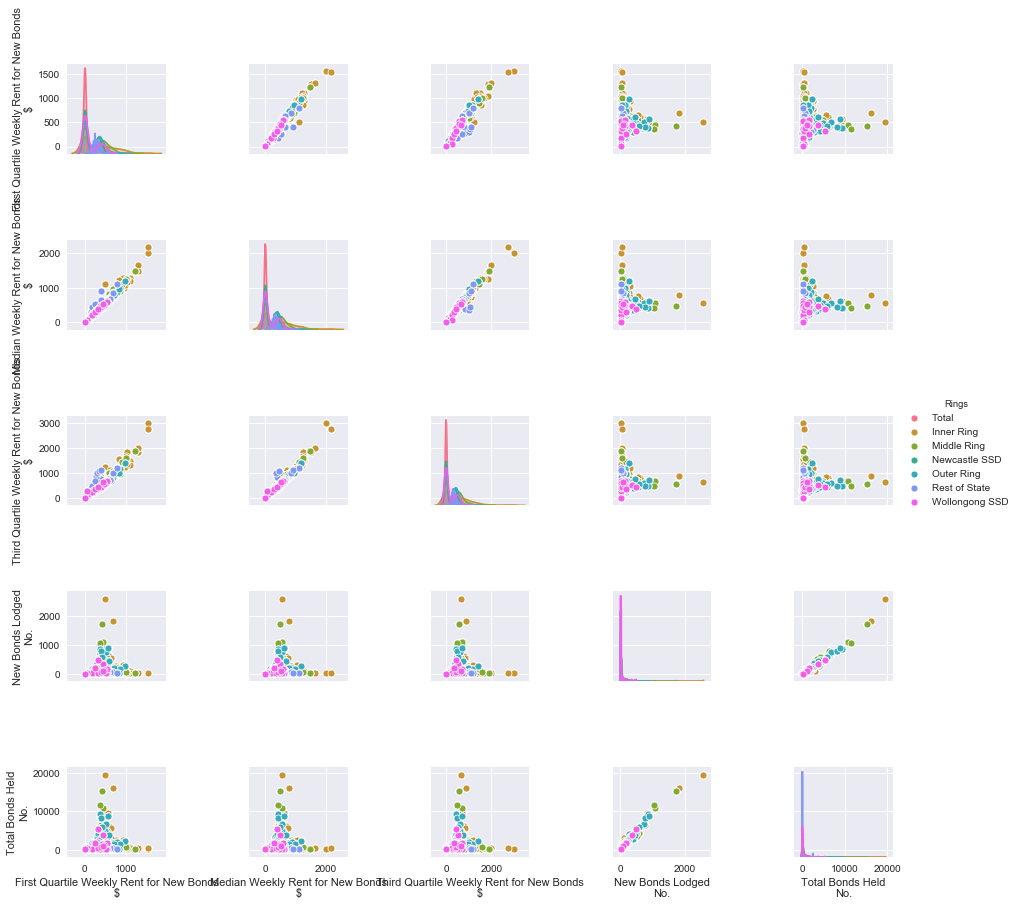

In [15]:
g = sns.pairplot(LGA_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'], hue='Rings')

In [16]:
LGA_clean.describe()

,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
count,20848.000000,20848.000000,20848.00000,20848.000000,20848.000000,20832.000000,20840.000000,20832.000000,20840.000000
mean,127.384881,144.294705,164.21604,35.909823,297.019186,7.058049,7.053787,7.081812,7.100564
std,209.315538,242.789895,285.68111,106.954060,998.913554,4.558111,4.561163,4.527474,4.525275
min,10.000000,10.000000,10.00000,10.000000,10.000000,-0.872100,-0.862500,-0.721500,-0.705100
25%,10.000000,10.000000,10.00000,10.000000,10.000000,0.044400,0.060600,0.387825,0.375000
50%,10.000000,10.000000,10.00000,10.000000,35.000000,10.000000,10.000000,10.000000,10.000000
75%,250.000000,280.000000,310.00000,30.000000,172.000000,10.000000,10.000000,10.000000,10.000000
max,1550.000000,2175.000000,3000.00000,2571.000000,19439.000000,10.000000,10.000000,10.000000,25.000000


### Data Cleaning postcode dataframe

In [17]:
postcode.rename(columns={'Bedroom Numbers':'Bedroom_Numbers'}, inplace=True)

In [18]:
postcode.rename(columns={'Dwelling Types':'Dwelling_Types'}, inplace=True)

In [19]:
postcode_clean =  postcode[postcode.Bedroom_Numbers != 'Total']

In [20]:
postcode_clean =  postcode_clean[postcode.Dwelling_Types != 'Total']

C:\Users\mukit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [21]:
print(postcode_clean.shape)
postcode_clean.head(200)

(10291, 12)


,Postcode,Dwelling_Types,Bedroom_Numbers,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
3,1360,Flat/Unit,2 Bedrooms,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
7,1790,Flat/Unit,2 Bedrooms,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
11,1825,Other,2 Bedrooms,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
15,1860,Townhouse,3 Bedrooms,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
19,1871,Other,Not Specified,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
28,2000,House,Bedsitter,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
29,2000,House,1 Bedroom,10,10,10,10,30,10.0000,10.0000,10.0000,10.0000
30,2000,House,Not Specified,10,10,10,10,10,10.0000,10.0000,10.0000,10.0000
31,2000,House,2 Bedrooms,10,10,10,10,43,10.0000,10.0000,10.0000,10.0000
32,2000,House,3 Bedrooms,10,10,10,10,30,10.0000,10.0000,10.0000,10.0000


In [22]:
postcode_clean.columns

Index(['Postcode', 'Dwelling_Types', 'Bedroom_Numbers',
       'First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.', 'Quarterly change in Median Weekly Rent',
       'Annual change in Median Weekly Rent',
       'Quarterly change in New Bonds Lodged',
       'Annual change in New Bonds Lodged'],
      dtype='object')

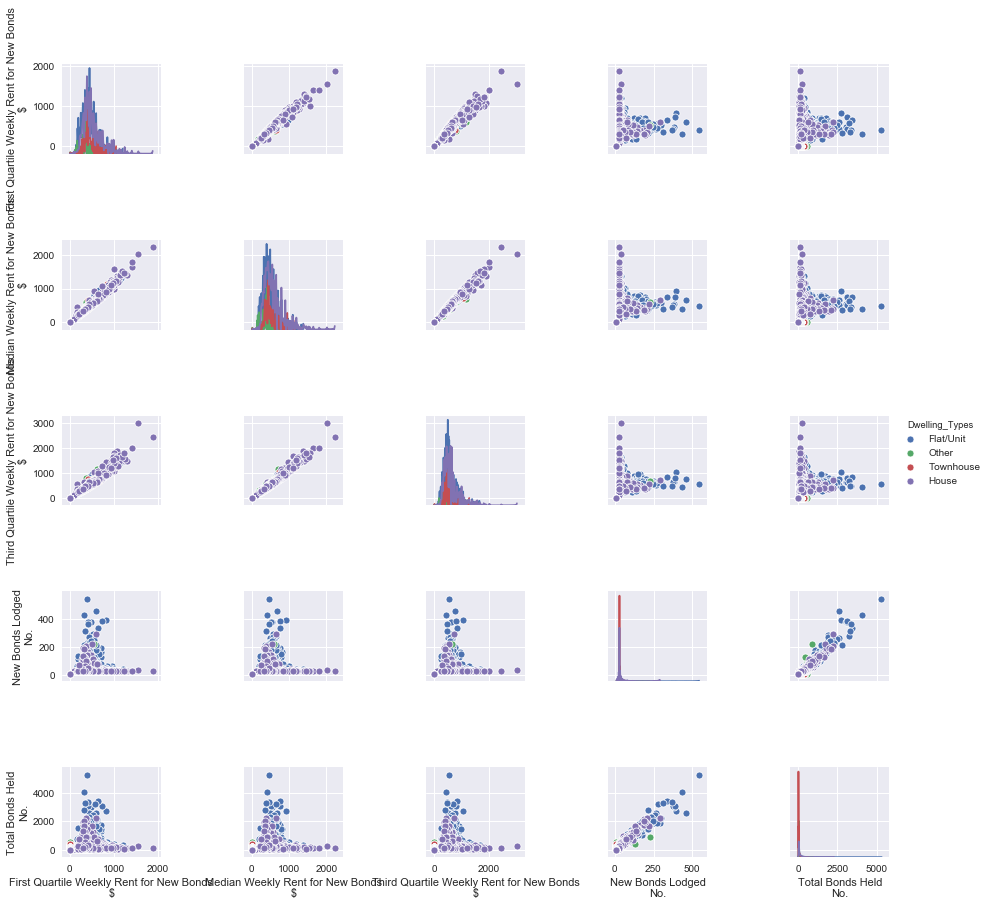

In [23]:
g = sns.pairplot(postcode_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'],hue='Dwelling_Types')

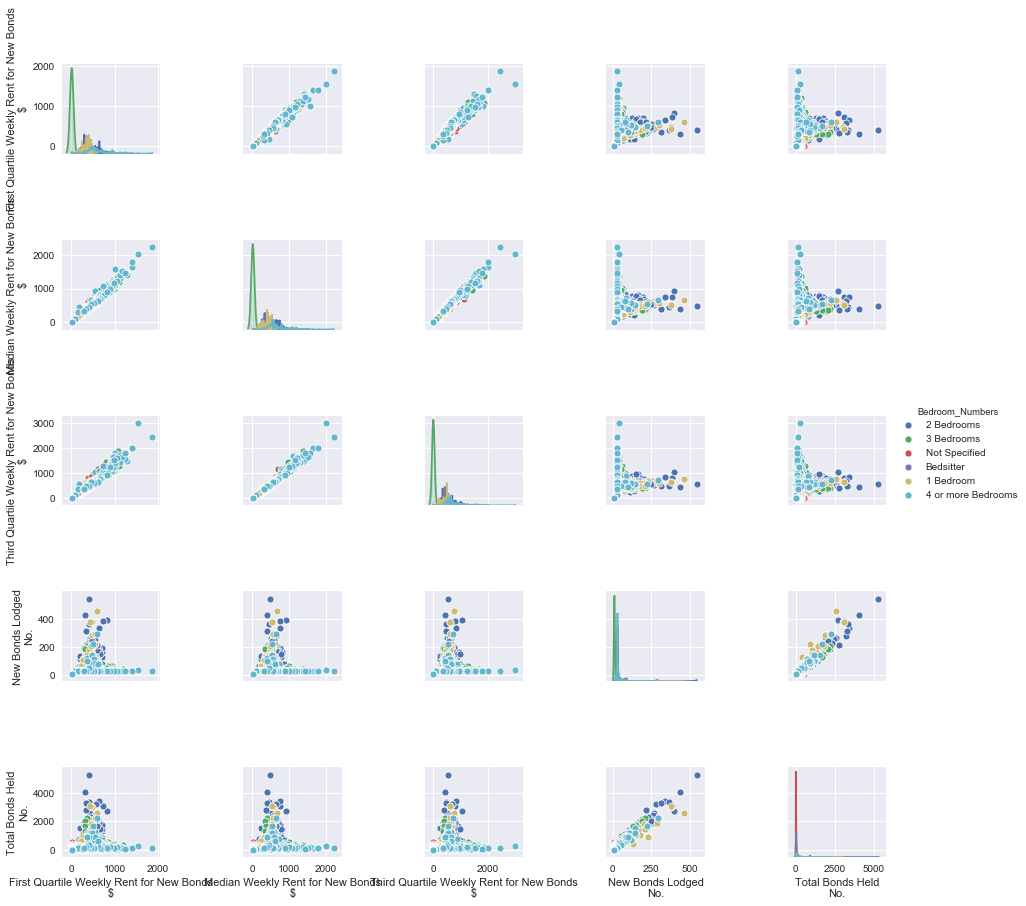

In [24]:
g = sns.pairplot(postcode_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'],hue='Bedroom_Numbers')

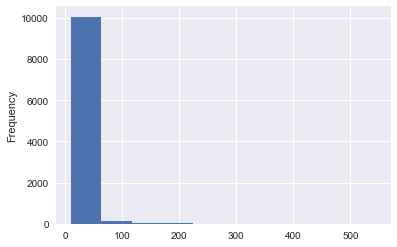

In [25]:
dfNB= postcode_clean['New Bonds Lodged\nNo.']
dfNB.plot.hist()

In [26]:
postcode_clean.describe()

,Postcode,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
count,10291.000000,10291.000000,10291.000000,10291.00000,10291.000000,10291.000000,10289.000000,10289.000000,10289.000000,10289.000000
mean,2374.929550,76.600913,84.319114,92.90720,15.629288,79.421631,8.558095,8.557565,8.579208,8.595388
std,278.292417,178.654555,201.511712,227.92524,22.898926,221.271911,3.514123,3.515231,3.472402,3.433147
min,1360.000000,10.000000,10.000000,10.00000,10.000000,10.000000,-0.350600,-0.450000,-0.863600,-0.924200
25%,2142.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
50%,2320.000000,10.000000,10.000000,10.00000,10.000000,30.000000,10.000000,10.000000,10.000000,10.000000
75%,2570.000000,10.000000,10.000000,10.00000,10.000000,53.000000,10.000000,10.000000,10.000000,10.000000
max,5341.000000,1875.000000,2225.000000,3000.00000,544.000000,5289.000000,10.000000,10.000000,12.000000,10.000000


#testing